# **Softmax**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

In [3]:
df = sns.load_dataset('iris')

In [6]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
115,6.4,3.2,5.3,2.3,virginica
22,4.6,3.6,1.0,0.2,setosa


In [9]:
#  Label encoding 

encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [11]:
# taking usable columns
df = df[['sepal_length','petal_length','species']]

In [12]:
# data separation

X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [13]:
#  train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### Applying softmax

In [14]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train) # model learning data patterns

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [15]:
# model prediction

y_pred = clf.predict(X_test)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

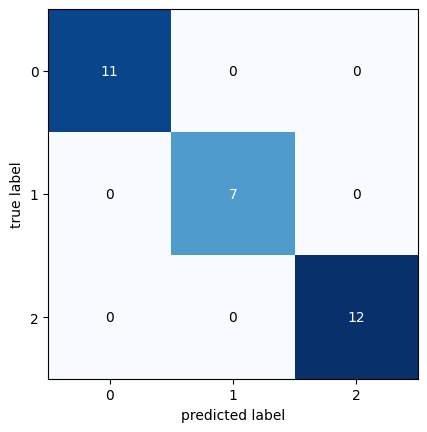

In [16]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [44]:
# accuracy

accuracy_score(y_test, y_pred)

1.0

### Predict Probability instead of **Percentage**

In [40]:
p1,p2,p3 = clf.predict_proba(np.array([[6.7,5.2]]))[0,:]
s = f"""
Probability for class1 = {p1}
Probability for class2 = {p2}
Probability for class3 = {p3}
"""
print(s, "Higher class will be the output")


Probability for class1 = 0.00018846468748939484
Probability for class2 = 0.33680646750126336
Probability for class3 = 0.6630050678112472
 Higher class will be the output


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

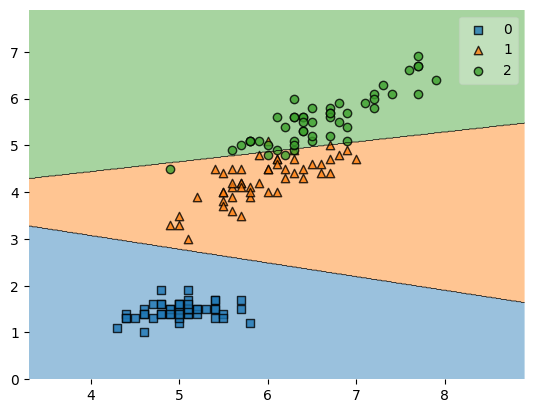

In [43]:
# Plotting decision regions

plot_decision_regions(X.values, y.values, clf)

In [46]:
# r2 score

r2_score(y_test, y_pred)

1.0

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4
